In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
from os import listdir
from os.path import join
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib._color_data as mcd

In [2]:
emb_dir = './embeddings/radius_2.0'
emb_list = listdir(emb_dir)
emb_list.sort()

In [3]:
vectors, labels = [], []
for label in emb_list:
    loaded = np.load(join(emb_dir,label), allow_pickle=True)

    for e in loaded:
        vectors.append(e.detach().numpy()[0])
        labels.append(label[:-4])

x = np.asarray(vectors)

In [4]:
# Normalize Data
x_norm = StandardScaler().fit_transform(x) # normalizing the features

print('Untouched:\t ', np.mean(x),'\t', np.std(x))
print('Normalized:\t ', np.mean(x_norm),'\t', np.std(x_norm))
x_norm.shape

Untouched:	  0.50067055 	 0.073979214
Normalized:	  -1.0525927e-08 	 1.0


(3760, 1280)

In [5]:

pca = PCA(n_components=3)
components_ear = pca.fit_transform(x_norm)

ear_df = pd.DataFrame(data = components_ear, index = labels, columns = ['Component 1', 'Component 2', 'Component 3'],)


ear_df.head()

,Component 1,Component 2,Component 3
alexander_bec,-2.897659,-8.432920,12.079601
alexander_bec,-7.278631,-5.762993,12.076056
alexander_bec,-4.215929,-11.224473,10.930137
alexander_bec,-6.226908,-5.715608,12.380097
alexander_bec,1.519281,-8.938179,2.300359


In [6]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
print('Total variance explained: {}'.format(sum(pca.explained_variance_ratio_)))


Explained variation per principal component: [0.42371818 0.29322845 0.26307604]
Total variance explained: 0.980022668838501


In [8]:
# Only for creating colors
ear_df['label'] = pd.Categorical(labels)
# my_color = ear_df['label'].cat.codes
# ear_df = ear_df.drop('persons', 1)

In [9]:
unique = list(set(labels))
unique.sort()

pseudonyms = dict()
for i, proband in enumerate(unique):
    pseudonyms[proband] = "Proband_"+str(i+1)

cluster_center = dict()
for person in unique:
    cluster_center[person] = (sum(ear_df.loc[person, 'Component 1'])/80, sum(ear_df.loc[person, 'Component 2'])/80, sum(ear_df.loc[person, 'Component 3'])/80)

In [11]:
for i in pseudonyms:
    print(i, '\t--\t', pseudonyms[i])

alexander_bec 	--	 Proband_1
alina_sch 	--	 Proband_2
alissa_buh 	--	 Proband_3
amanda_dab 	--	 Proband_4
anna_kab 	--	 Proband_5
anni_qua 	--	 Proband_6
beatrix_mah 	--	 Proband_7
clara_pau 	--	 Proband_8
clemens_blu 	--	 Proband_9
collin_sch 	--	 Proband_10
david_fau 	--	 Proband_11
falco_len 	--	 Proband_12
felix_mec 	--	 Proband_13
gregor_spi 	--	 Proband_14
hammam_als 	--	 Proband_15
janna_qua 	--	 Proband_16
janole_pen 	--	 Proband_17
jesse_kru 	--	 Proband_18
johannes_wie 	--	 Proband_19
jule_dre 	--	 Proband_20
julia_fis 	--	 Proband_21
konrad_von 	--	 Proband_22
lars_fin 	--	 Proband_23
linus_fal 	--	 Proband_24
lynn_man 	--	 Proband_25
maike_her 	--	 Proband_26
malte_gas 	--	 Proband_27
marcel_nim 	--	 Proband_28
marcus_jue 	--	 Proband_29
marejke_wen 	--	 Proband_30
marina_fri 	--	 Proband_31
marina_han 	--	 Proband_32
matilda_kni 	--	 Proband_33
meiko_pri 	--	 Proband_34
mila_wol 	--	 Proband_35
mohammed_muh 	--	 Proband_36
moritz_bor 	--	 Proband_37
moritz_mei 	--	 Proband

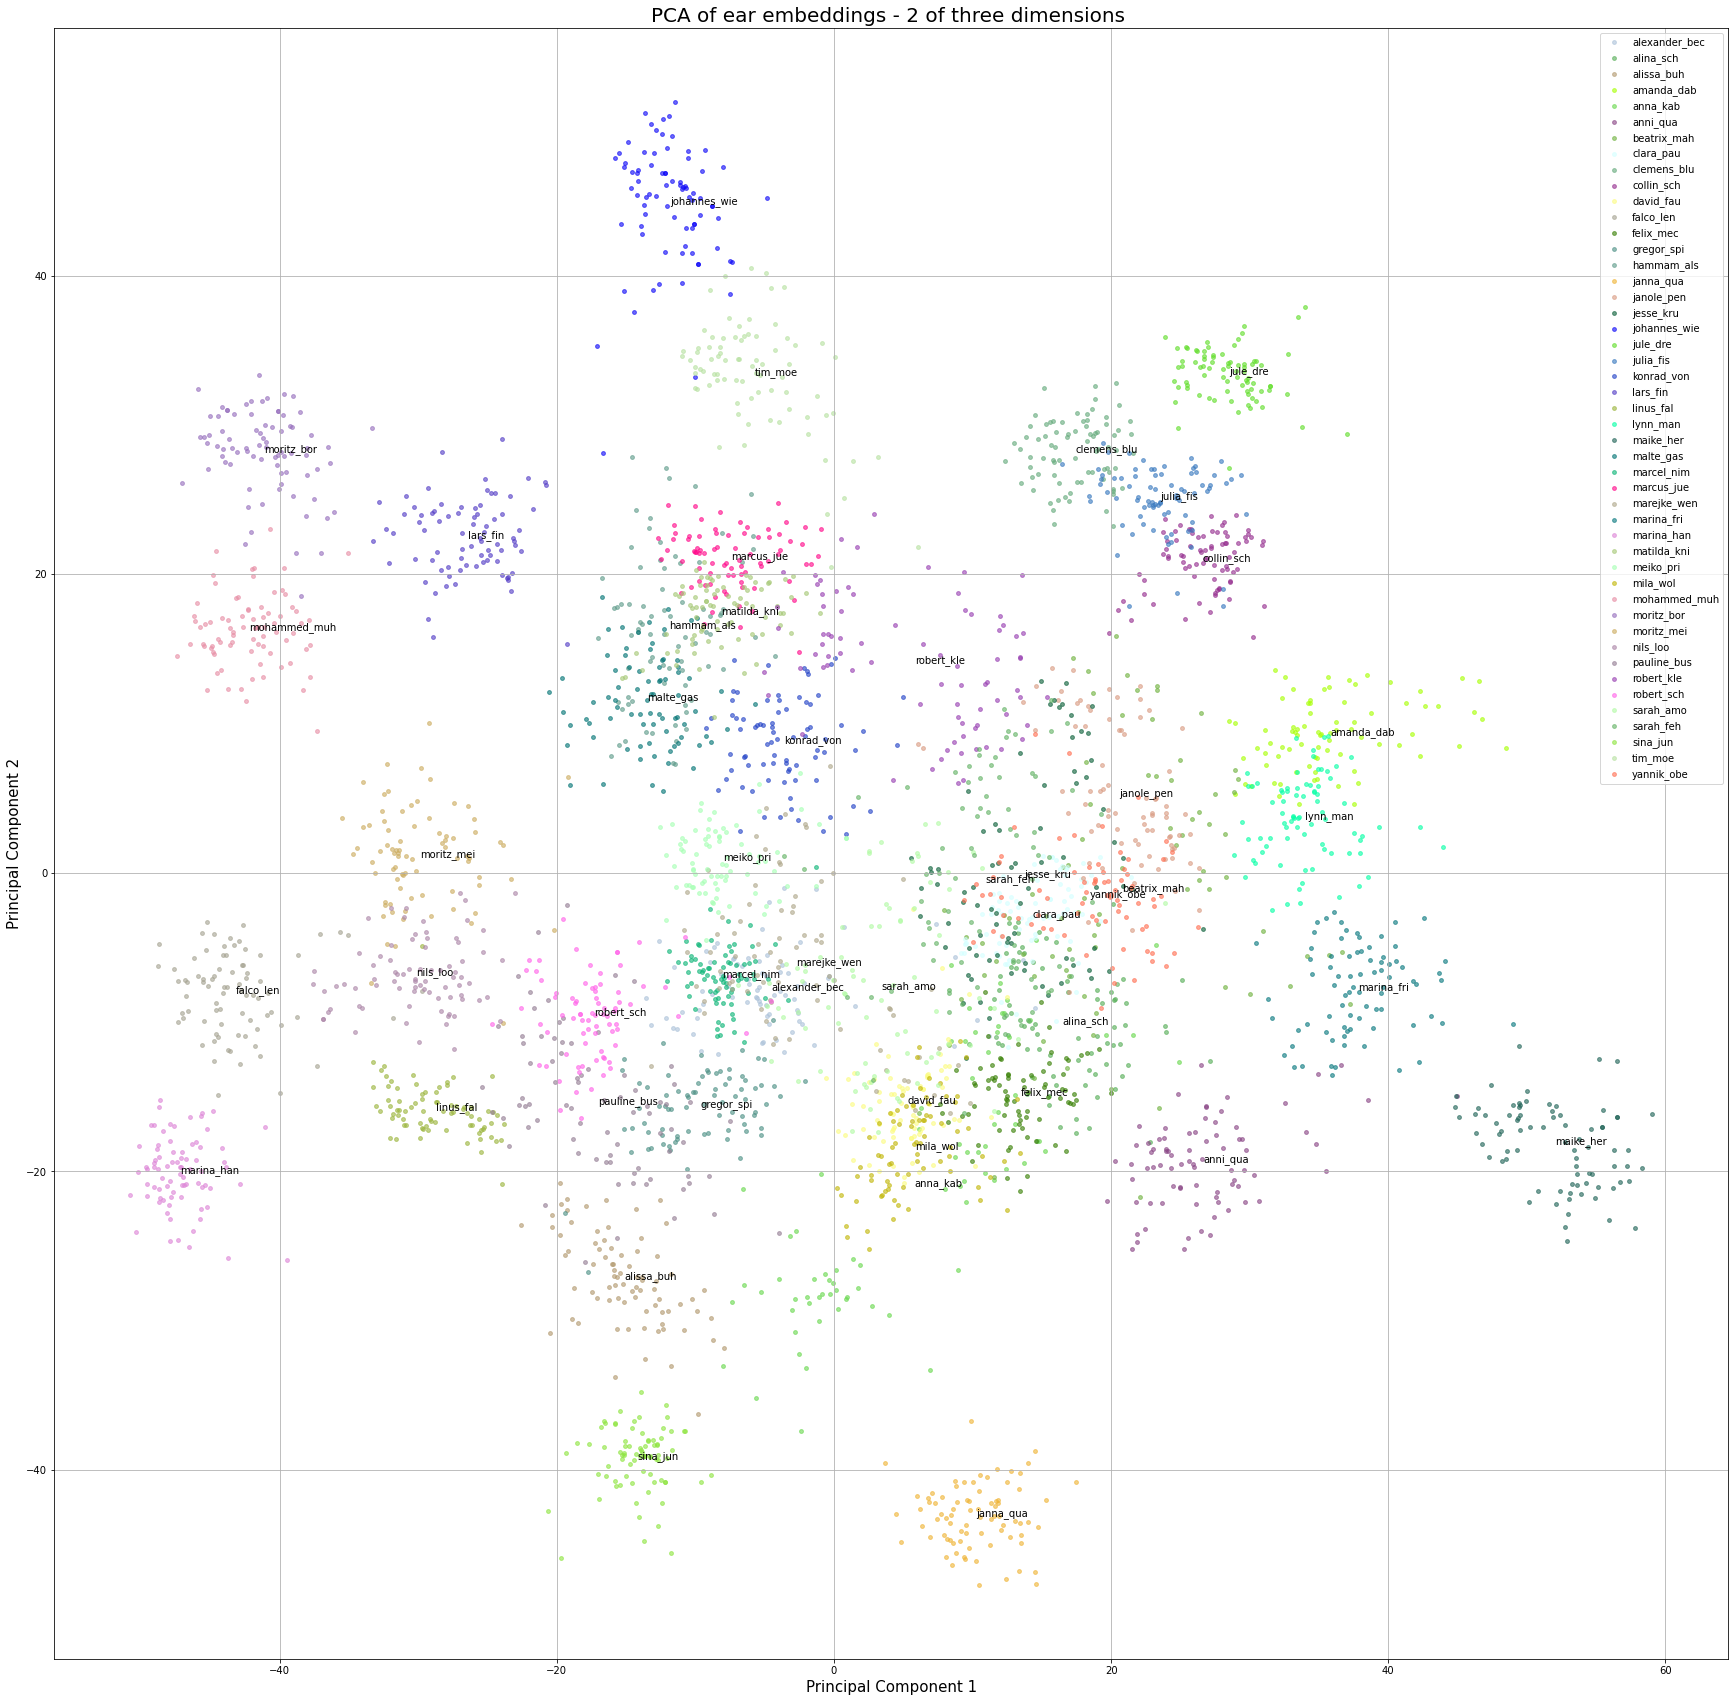

In [23]:
## DEFINE X- and Y- AXIS
x_component = 1
y_component = 2
assert x_component >= 1 and x_component <=3 and y_component >= 1 and y_component <=3
# Plot preparations
fig = plt.figure(figsize = (30,30))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component ' + str(x_component), fontsize = 15)
ax.set_ylabel('Principal Component ' + str(y_component), fontsize = 15)
ax.set_title('PCA of ear embeddings - 2 of three dimensions ', fontsize = 20)
targets = unique
colors = list(mcd.XKCD_COLORS.values())
for target, color in zip(targets,colors):
    indicesToKeep = ear_df['label'] == target
    # ax.scatter(x=cluster_center[target][0], y=cluster_center[target][1], s=5, c='red', marker='*')
    ax.scatter(ear_df.loc[indicesToKeep, 'Component ' + str(x_component)]
               , ear_df.loc[indicesToKeep, 'Component ' + str(y_component)]
               , c = color
               , s = 15
               , alpha=0.6)

# SWITCH annotations and legend respectively if pseudonyms are wanted
    ax.annotate(s=pseudonyms[target], xy=(cluster_center[target][x_component-1], cluster_center[target][y_component-1]), textcoords='data' )
    # ax.annotate(s=target, xy=(cluster_center[target][x_component-1], cluster_center[target][y_component-1]), textcoords='data' )
ax.legend(pseudonyms.values())
# ax.legend(targets)

ax.grid()

In [17]:
def sort_dict_by_component(dictionary, component, reverse=False):
    '''Function to sort the cluster center dictionary by the component
    Arguments
    ----------
    component: 1, 2 or 3 representing the 3 dimensions
    reverse: default is false, returning an ascending order

    Returns
    ----------
    sorted_reduced: a list containing the tuples of (key, component) of specified component
    '''

    assert component>=1 and component<=3
    # change to array space
    component -= 1

    sorted_values = sorted(dictionary.items(), key=lambda x: x[1][component], reverse=reverse)

    sorted_reduced = [(label, values[component]) for (label, values) in sorted_values]
    return sorted_reduced

In [21]:
## Set component 1, 2 or 3
c = 1

sort_values = sort_dict_by_component(cluster_center, c)
print('These are the values of the component ', c, '\n')
for l,v in sort_values:
    print('{:>20} : {:<}'.format(pseudonyms[l],v))
    # print('{:>20} : {:<}'.format(l,v))


These are the values of the component  1 

          Proband_32 : -47.196837711334226
          Proband_12 : -43.183333015441896
          Proband_36 : -42.173762512207034
          Proband_37 : -41.105995178222656
          Proband_39 : -30.14887340068817
          Proband_38 : -29.834985876083373
          Proband_24 : -28.741042590141298
          Proband_23 : -26.417129135131837
          Proband_42 : -17.279258179664613
          Proband_40 : -17.025280129909515
           Proband_3 : -15.09560251235962
          Proband_45 : -14.200845205783844
          Proband_27 : -13.511407560110092
          Proband_15 : -11.92944370508194
          Proband_19 : -11.860042470693589
          Proband_14 : -9.656931200623513
          Proband_33 : -8.167532828450202
          Proband_28 : -8.083194330334663
          Proband_34 : -7.974356372654438
          Proband_29 : -7.392041820287704
          Proband_46 : -5.736528696119786
           Proband_1 : -4.514292165637016
          Proband_22 

In [ ]:
val = [v for _,v in sort_values]
steps = []
for i in range(len(val)-1):
    steps.append(abs(val[i]-val[i+1]))

steps.sort()

print('Average step size\t: ', np.mean(steps))
print('Median of step size\t: ', np.median(steps))
steps_int = [int(x) for x in steps]
print(steps)
print(steps_int)